Face Mask and Social Distancing detection using CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

# !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 71 bytes


In [ ]:
#Face mask
# ! kaggle datasets download -d andrewmvd/face-mask-detection

 98% 389M/398M [00:05<00:00, 54.0MB/s]
100% 398M/398M [00:05<00:00, 81.8MB/s]


In [ ]:
# from zipfile import ZipFile
# import os

# # Define the path to the ZIP archive.
# file_name = "/content/face-mask-detection.zip"

# # Create a target directory for extraction.
# target_directory = "/content/drive/MyDrive/mask"
# if not os.path.exists(target_directory):
#     os.makedirs(target_directory)

# # Open the ZIP archive and extract all species data.
# with ZipFile(file_name, 'r') as zip:
#     # Extract all contents from the ZIP archive to the target directory.
#     zip.extractall(target_directory)

# print('Done')

Done


In [ ]:
# Social Distancing
# ! kaggle datasets download -d priteshraj10/detect-social-distancingcovid19

 99% 139M/140M [00:01<00:00, 124MB/s]
100% 140M/140M [00:01<00:00, 121MB/s]


In [ ]:
# from zipfile import ZipFile
# import os

# # Define the path to the ZIP archive.
# file_name = "/content/detect-social-distancingcovid19.zip"

# # Create a target directory for extraction.
# target_directory = "/content/drive/MyDrive/social_dis"
# if not os.path.exists(target_directory):
#     os.makedirs(target_directory)

# # Open the ZIP archive and extract all species data.
# with ZipFile(file_name, 'r') as zip:
#     # Extract all contents from the ZIP archive to the target directory.
#     zip.extractall(target_directory)

# print('Done')

Done


In [ ]:
import os
import shutil
import random

# Set paths to the directories of the two datasets
face_mask_dataset_path = "/content/drive/MyDrive/mask"  # Change this path to the actual dataset directory
social_distancing_dataset_path = "/content/drive/MyDrive/social_dis"  # Change this path to the actual dataset directory

# Define the target directory where you want to merge the datasets
merged_dataset_path = "/content/drive/MyDrive/merged-dataset"

# Create the target directory if it doesn't exist
os.makedirs(merged_dataset_path, exist_ok=True)

# Copy the Face Mask Detection dataset to the merged directory
shutil.copytree(face_mask_dataset_path, os.path.join(merged_dataset_path, "FaceMask"))

# Copy the Social Distancing dataset to the merged directory
shutil.copytree(social_distancing_dataset_path, os.path.join(merged_dataset_path, "SocialDistancing"))

# Now you have both datasets in the merged directory

# If you want to randomly shuffle the data, you can do that too
# For example, shuffling image files within each class
for class_dir in os.listdir(merged_dataset_path):
    class_path = os.path.join(merged_dataset_path, class_dir)
    if os.path.isdir(class_path):
        files = os.listdir(class_path)
        random.shuffle(files)
        for i, file in enumerate(files):
            new_name = f"{i + 1:04d}.jpg"
            os.rename(os.path.join(class_path, file), os.path.join(class_path, new_name))

# Now the data in the merged dataset is shuffled within each class


In [85]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import random
from IPython.display import Image
import shutil

EDA

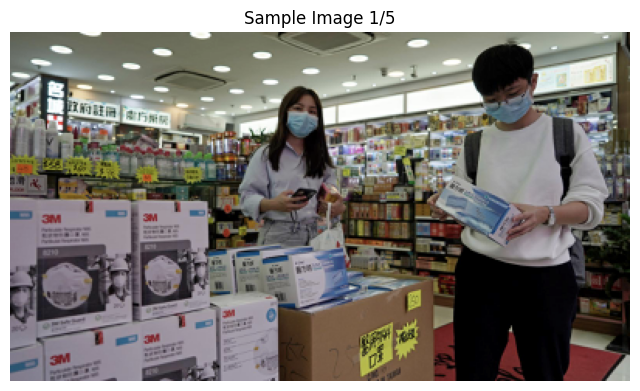

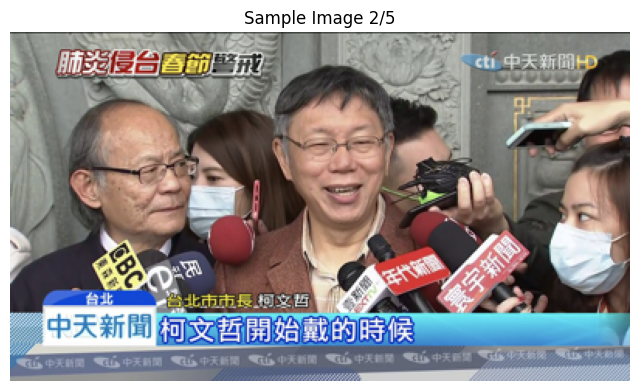

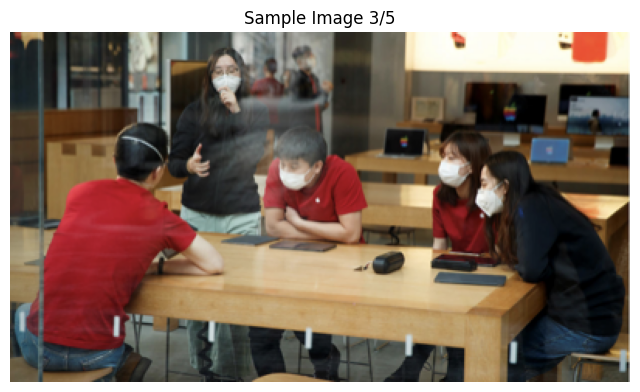

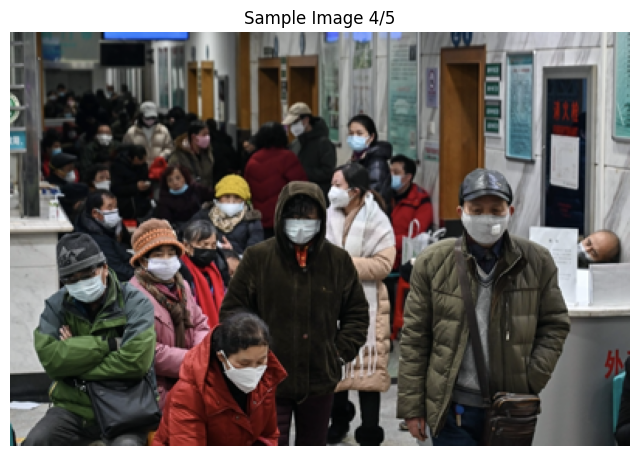

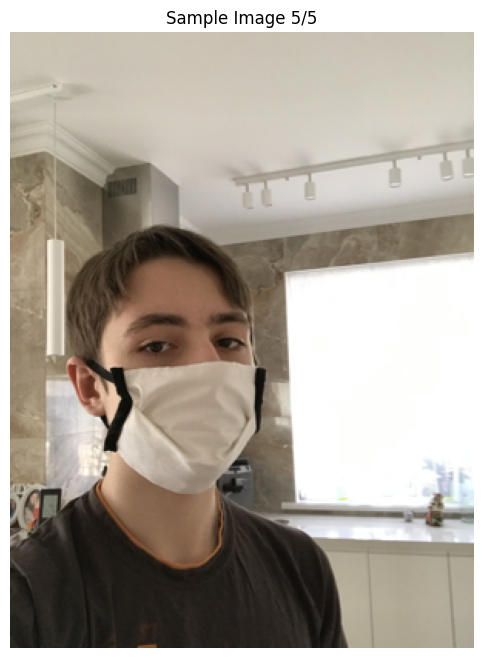

In [32]:
# Sample images without bounding boxes
import os
import cv2
import random
import matplotlib.pyplot as plt

# path to the image folder
image_folder = "/content/drive/MyDrive/mask/images"

# Get the list of image files
image_files = os.listdir(image_folder)

#  number of images to display
num_images_to_display = 5

# Randomly select and display five sample images
for i in range(num_images_to_display):
    random_image_index = random.randint(0, len(image_files) - 1)
    random_image_file = os.path.join(image_folder, image_files[random_image_index])


    image = cv2.imread(random_image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title(f"Sample Image {i + 1}/{num_images_to_display}")
    plt.axis('off')
    plt.show()


Sample images with bounding boxes

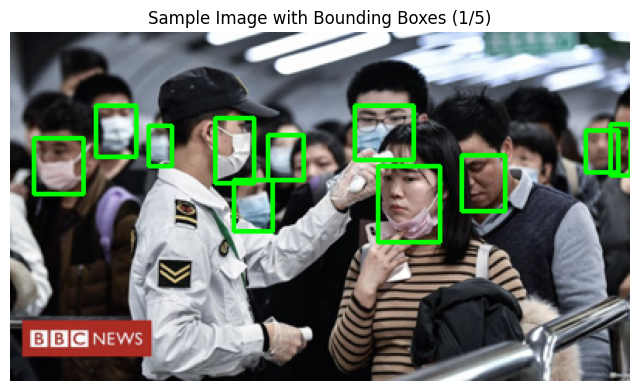

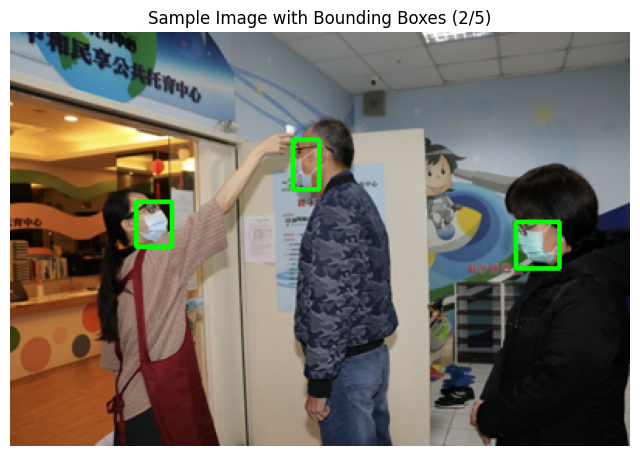

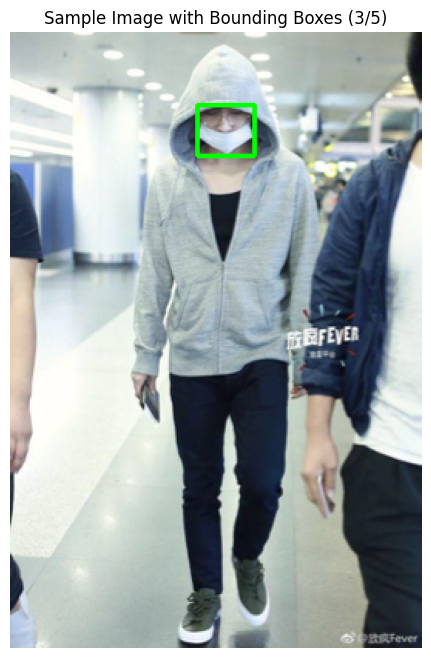

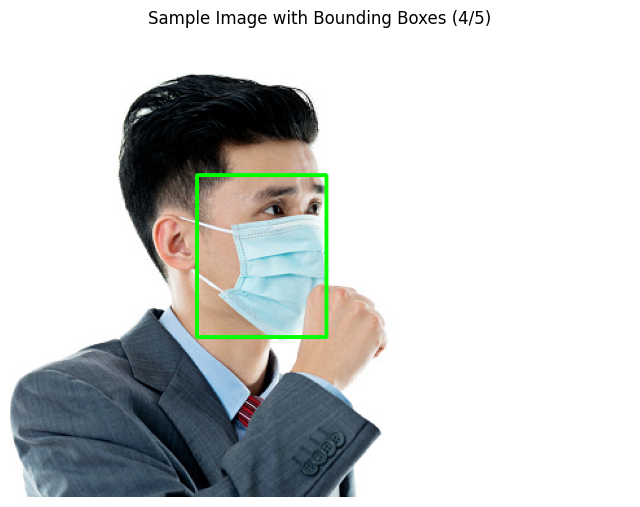

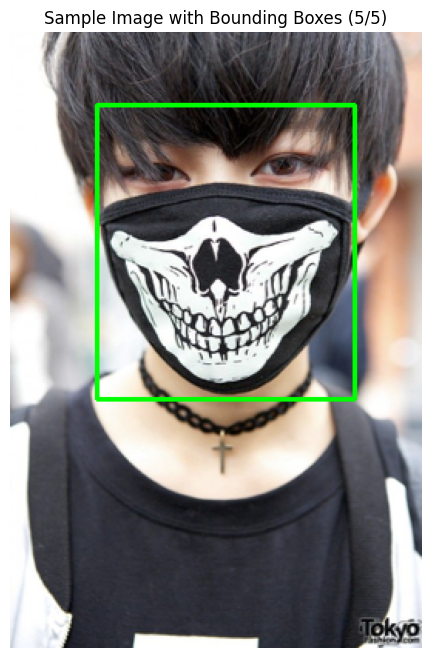

In [34]:


xml_folder = "/content/drive/MyDrive/mask/annotations"
image_folder = "/content/drive/MyDrive/mask/images"

# list of XML and image files
xml_files = os.listdir(xml_folder)
image_files = os.listdir(image_folder)

#  number of samples to display
num_samples_to_display = 5

# Randomly select and display five samples from both folders
for i in range(num_samples_to_display):
    # Select a random sample from the dataset
    random_sample_index = random.randint(0, len(xml_files) - 1)

    # Get the paths to the XML and image files
    sample_xml_file = os.path.join(xml_folder, xml_files[random_sample_index])
    sample_image_file = os.path.join(image_folder, image_files[random_sample_index])

    # Load and display the image
    image = cv2.imread(sample_image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Parse the XML file (modify this part to your XML format)
    tree = ET.parse(sample_xml_file)
    root = tree.getroot()

    # Visualize the image with bounding boxes (if applicable)
    for obj in root.findall("object"):
        box = obj.find("bndbox")
        x_min = int(box.find("xmin").text)
        y_min = int(box.find("ymin").text)
        x_max = int(box.find("xmax").text)
        y_max = int(box.find("ymax").text)
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title(f"Sample Image with Bounding Boxes ({i+1}/{num_samples_to_display})")
    plt.axis('off')
    plt.show()


In [35]:
classes

['annotations', 'images']

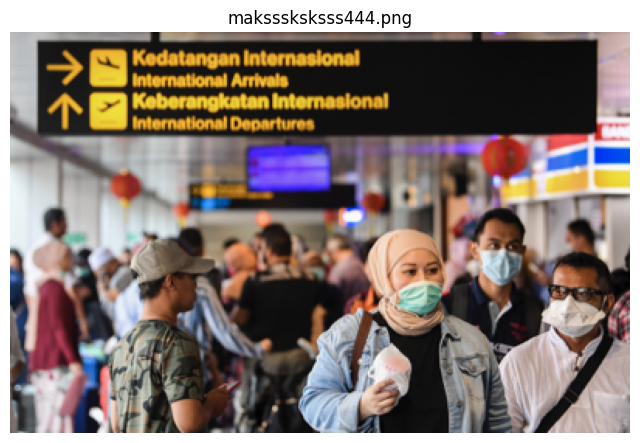

IntSlider(value=384, description='Image Index', max=852)

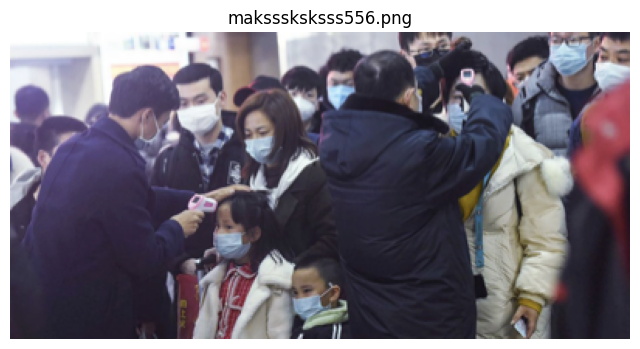

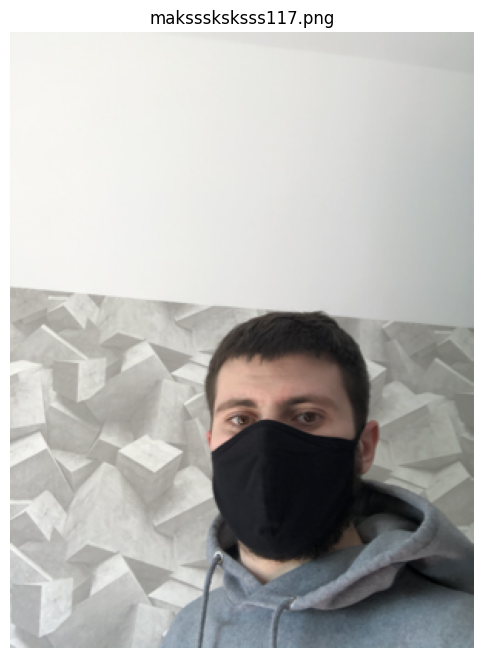

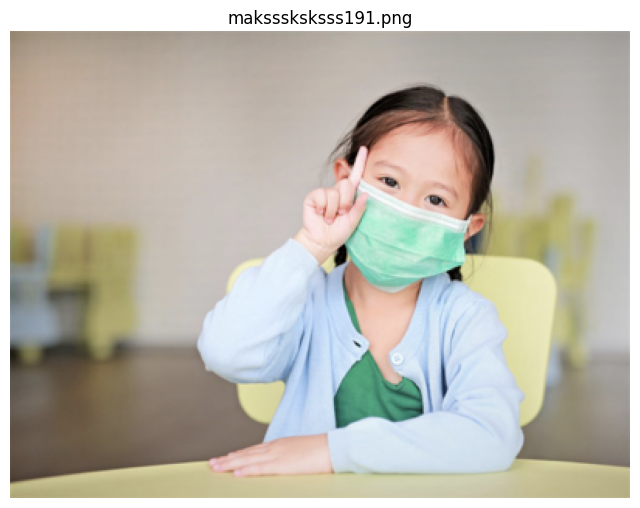

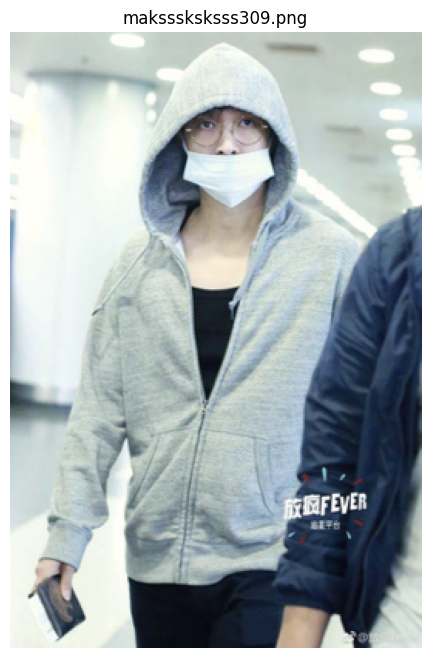

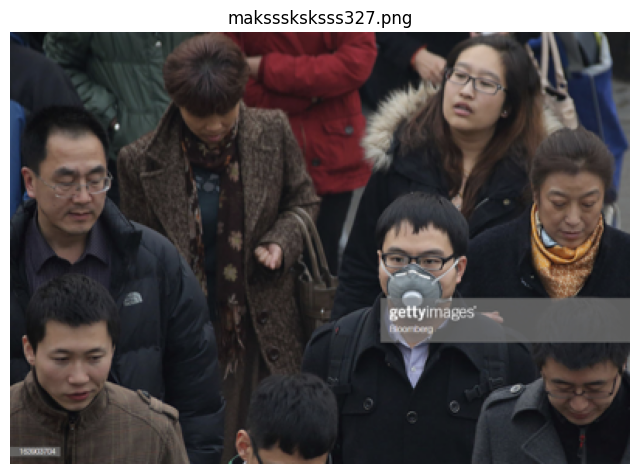

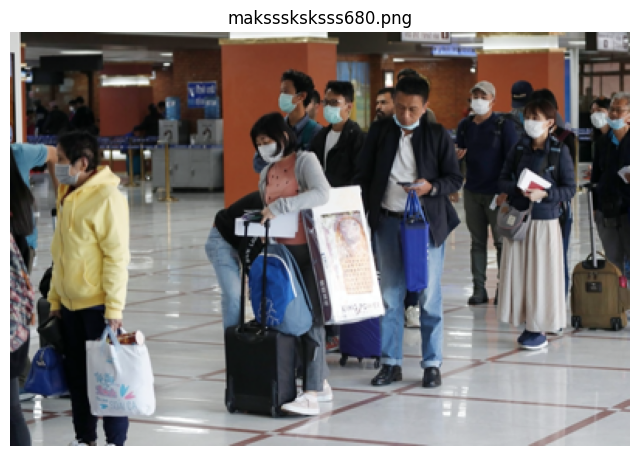

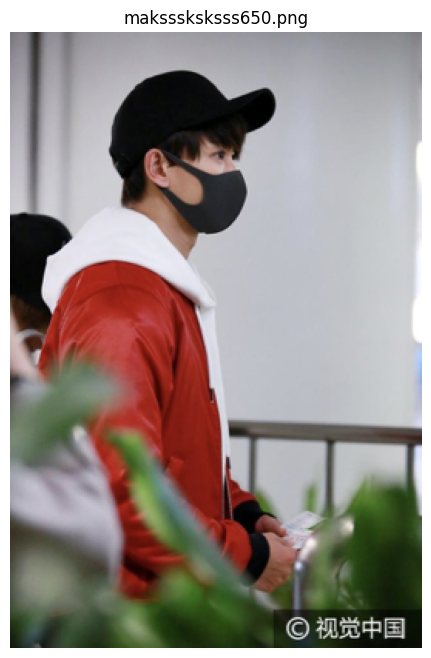

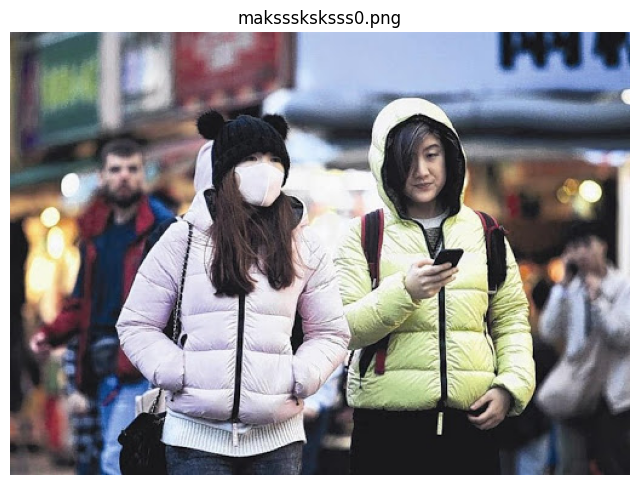

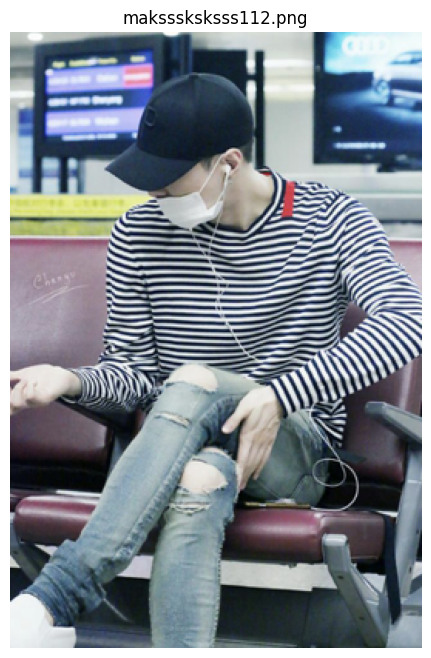

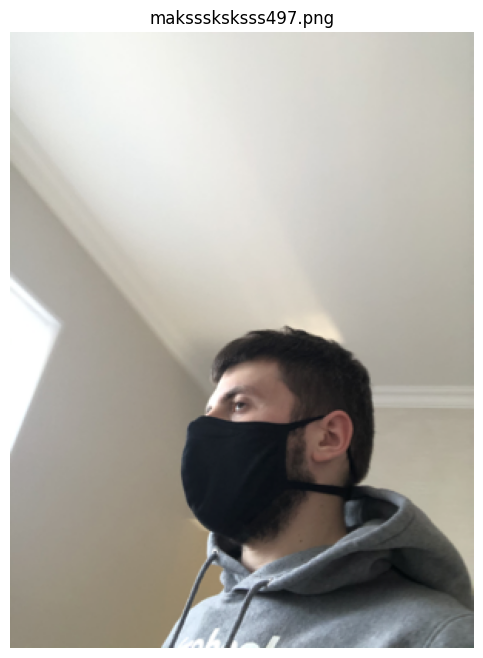

In [76]:

# path to the folder containing your images
folder_path = "/content/drive/MyDrive/mask/images"

#list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Number of random images to display
num_images_to_display = 5

# Create a slider for image selection
image_slider = widgets.IntSlider(value=0, min=0, max=len(image_files) - 1, step=1, description='Image Index')

# Define a function to update and display the selected image
def update_image(change):
    selected_image_index = change.new
    image_file = image_files[selected_image_index]
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title(image_file)
    plt.axis('off')
    plt.show()

# Link the slider to the update function
image_slider.observe(update_image, names='value')

# Randomly select the initial image to display
random_initial_image_index = random.randint(0, len(image_files) - 1)
image_slider.value = random_initial_image_index

# Display the slider and initial image
display(image_slider)
update_image({'new': random_initial_image_index})  # Remove this line


In [41]:


# paths to the dataset folders
image_folder = "/content/drive/MyDrive/mask/images"

# list of image files
image_files = os.listdir(image_folder)

# Data Statistics
num_images = len(image_files)
image_dimensions = []
image_sizes = []

# Calculate image dimensions and sizes
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    image_dimensions.append((width, height))
    image_size = os.path.getsize(image_path)
    image_sizes.append(image_size)

# Calculate average image dimensions and size
average_width = np.mean([dim[0] for dim in image_dimensions])
average_height = np.mean([dim[1] for dim in image_dimensions])
average_size = np.mean(image_sizes)

print(f"Number of Images: {num_images}")
print(f"Average Image Width: {average_width:.2f} pixels")
print(f"Average Image Height: {average_height:.2f} pixels")
print(f"Average Image Size: {average_size:.2f} bytes")


Number of Images: 853
Average Image Width: 370.59 pixels
Average Image Height: 309.29 pixels
Average Image Size: 488055.41 bytes


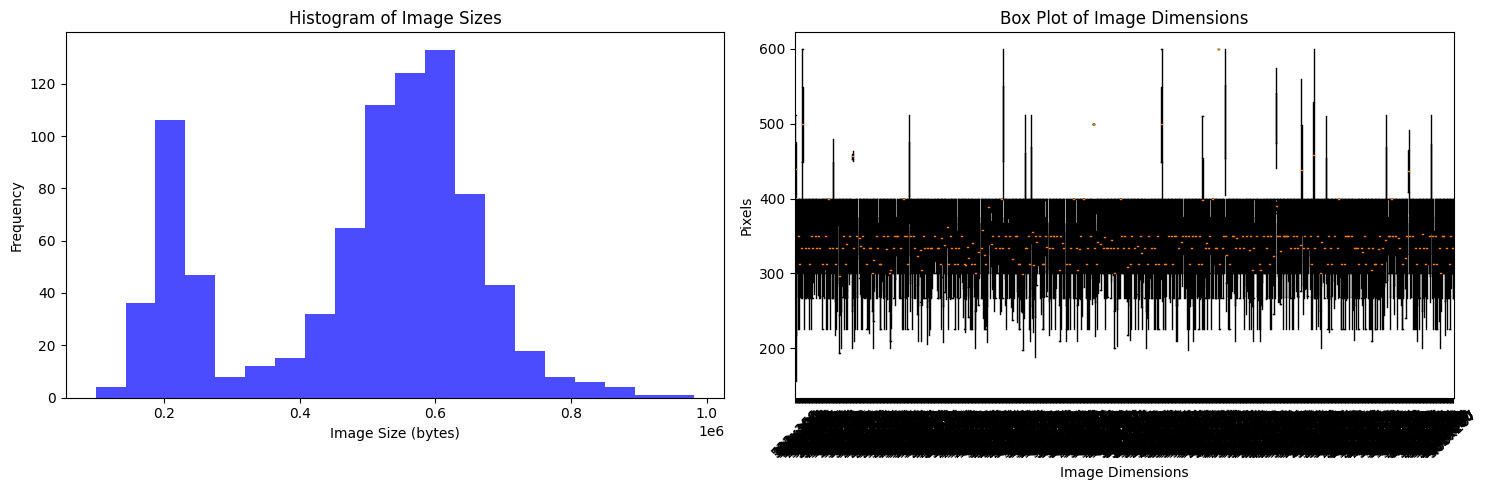

In [49]:


# Create subplots
fig, ( ax2, ax3) = plt.subplots(1, 2, figsize=(15, 5))



# Histogram for Image Sizes
ax2.hist(image_sizes, bins=20, color='blue', alpha=0.7)
ax2.set_xlabel("Image Size (bytes)")
ax2.set_ylabel("Frequency")
ax2.set_title("Histogram of Image Sizes")

# Box Plot for Image Dimensions
dimensions = [f"{dim[0]}x{dim[1]}" for dim in image_dimensions]
ax3.boxplot(image_dimensions)
ax3.set_xticklabels(dimensions, rotation=45)
ax3.set_xlabel("Image Dimensions")
ax3.set_ylabel("Pixels")
ax3.set_title("Box Plot of Image Dimensions")

plt.tight_layout()
plt.show()







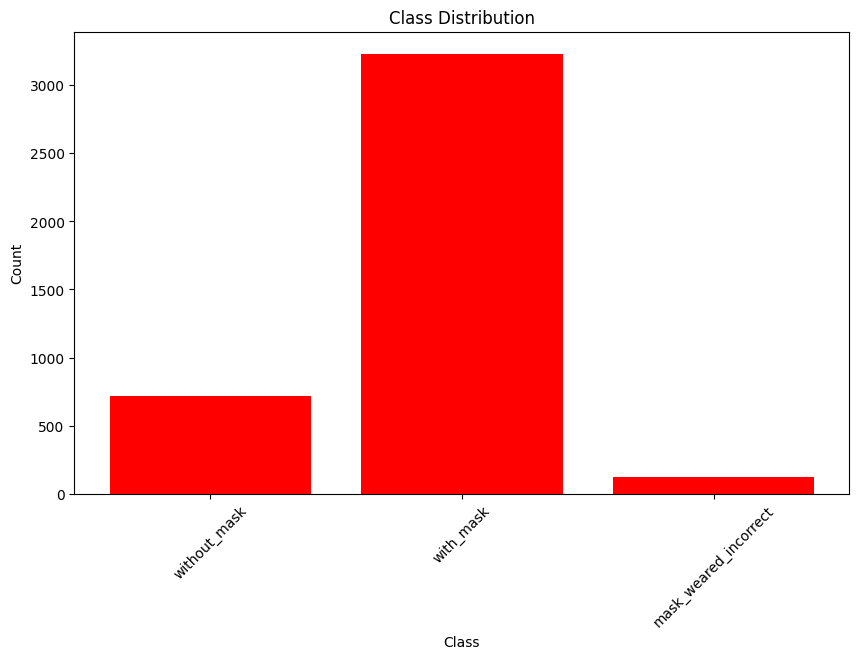

In [52]:


image_folder = "/content/drive/MyDrive/mask"
xml_folder = "/content/drive/MyDrive/mask/annotations"

# list of XML files
xml_files = os.listdir(xml_folder)

#  dictionary to store class counts
class_counts = {}

# Parse XML files and count class occurrences
for xml_file in xml_files:
    xml_path = os.path.join(xml_folder, xml_file)

    # Parse the XML file
    tree = ET.parse(xml_path)
    root = tree.getroot()

    #  class label is stored within an <object> tag
    for obj in root.findall("object"):
        class_name = obj.find("name").text

        # Update the class count
        if class_name in class_counts:
            class_counts[class_name] += 1
        else:
            class_counts[class_name] = 1

# Visualize class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='red')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()


In [56]:
image_folder

'/content/drive/MyDrive/mask/images'

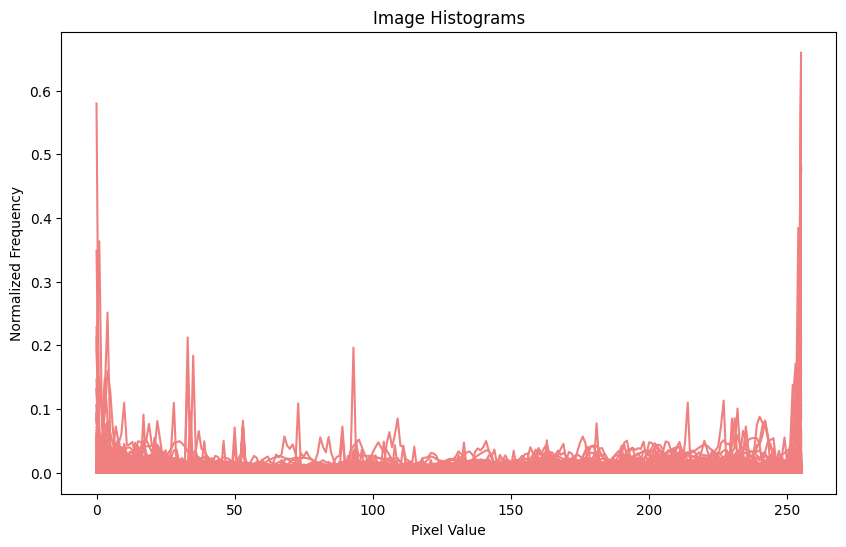

In [54]:



image_folder = "/content/drive/MyDrive/mask/images"

# list of image files
image_files = os.listdir(image_folder)

#  lists to store histograms
histograms = []

# Create histograms for each image
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)

    # Convert the image to grayscale if needed
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the histogram
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Normalize the histogram
    histogram /= histogram.sum()

    histograms.append(histogram)

# Plot the histograms
plt.figure(figsize=(10, 6))
for histogram in histograms:
    plt.plot(histogram, color='lightcoral')
plt.xlabel("Pixel Value")
plt.ylabel("Normalized Frequency")
plt.title("Image Histograms")
plt.show()


Data preprocessing

In [59]:
# preproceesing images and Creating preprocess image folder



dataset_folder = "/content/drive/MyDrive/mask/images"

#  destination
output_folder = "/content/drive/MyDrive/mask/Preprocess_img"
os.makedirs(output_folder, exist_ok=True)

# List all image files in the dataset folder
image_files = [f for f in os.listdir(dataset_folder) if f.endswith((".jpg", ".png", ".jpeg"))]

# preprocessing steps
def preprocess_image(image):
    # Resize the image to a specific size (e.g., 224x224)
    image = cv2.resize(image, (224, 224))

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize pixel values to [0, 1]
    normalized_image = gray_image / 255.0



    return normalized_image

# Process and save each image
for image_file in image_files:
    image_path = os.path.join(dataset_folder, image_file)
    image = cv2.imread(image_path)

    # Perform image preprocessing
    preprocessed_image = preprocess_image(image)

    # Save the preprocessed image to the output folder
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, preprocessed_image)


In [83]:



image_folder = "/content/drive/MyDrive/mask/Preprocess_img"

#  list of image files
image_files = os.listdir(image_folder)

# Load a sample image
image1 = cv2.imread(os.path.join(image_folder, image_files[0]), cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(os.path.join(image_folder, image_files[1]), cv2.IMREAD_GRAYSCALE)

# Calculate the Pearson correlation coefficient between the two images
correlation = np.corrcoef(image1, image2)[0, 1]

print(f"Pearson Correlation Coefficient: {correlation:.2f}")


Pearson Correlation Coefficient: 0.92


*  *Correlation Coefficient: 0.92 - suggests a strong positive linear relationship*

In [90]:
cv2.imread('/content/drive/MyDrive/mask/Preprocess_img/maksssksksss1.png')

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [89]:
cv2.imread('/content/drive/MyDrive/mask/images/maksssksksss1.png')

array([[[141, 136, 137],
        [143, 138, 138],
        [143, 137, 138],
        ...,
        [222, 227, 228],
        [226, 231, 231],
        [228, 233, 232]],

       [[144, 139, 139],
        [144, 139, 140],
        [145, 140, 140],
        ...,
        [223, 228, 229],
        [226, 231, 232],
        [228, 233, 232]],

       [[145, 140, 140],
        [145, 140, 141],
        [144, 139, 140],
        ...,
        [225, 229, 230],
        [227, 232, 232],
        [230, 235, 234]],

       ...,

       [[ 51,  49,  50],
        [ 46,  44,  46],
        [ 41,  37,  39],
        ...,
        [ 39,  34,  35],
        [ 38,  34,  35],
        [ 38,  34,  34]],

       [[ 50,  50,  51],
        [ 45,  45,  46],
        [ 41,  38,  39],
        ...,
        [ 39,  35,  35],
        [ 39,  35,  35],
        [ 36,  35,  35]],

       [[ 50,  49,  51],
        [ 45,  45,  46],
        [ 41,  38,  39],
        ...,
        [ 39,  35,  35],
        [ 39,  35,  35],
        [ 37,  35,  35]]

Splitting Data into training and testing  